In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [2]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [3]:
from tensorflow.keras.optimizers import Adam

learning_rate_list = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

results_loss, results_acc = [], []

for learning_rate in learning_rate_list:
    model = Sequential()
    model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(10, activation = 'softmax'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    
    history= model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test))
    hist = pd.DataFrame(history.history)
    results_loss.append(hist.loss.tolist())
    results_acc.append(hist.accuracy.tolist())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.6940 - accuracy: 0.8615 - val_loss: 1.6783 - val_accuracy: 0.8909
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9386 - accuracy: 0.8796 - val_loss: 1.9937 - val_accuracy: 0.8859
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9447 - accuracy: 0.8842 - val_loss: 1.9207 - val_accuracy: 0.8869
Epoch 4/10
1875/18

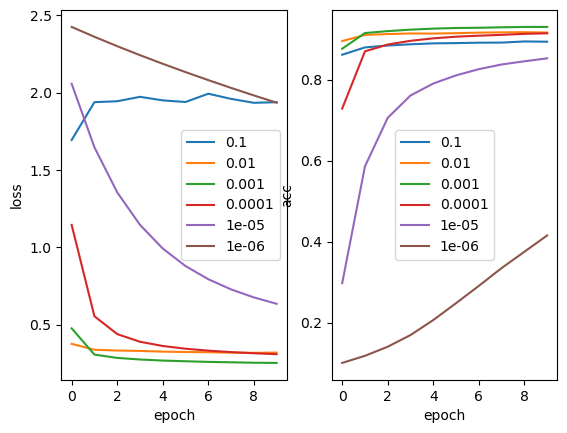

In [4]:
plt.subplot(1,2,1)
for i in range(6):
    plt.plot(results_loss[i], label = learning_rate_list[i])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
for i in range(6):
    plt.plot(results_acc[i], label = learning_rate_list[i])
plt.xlabel("epoch")
plt.ylabel("acc")
plt.legend()